C:\Users\ABC\AppData\Local\Temp/ipykernel_7396/3447615718.py:42: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


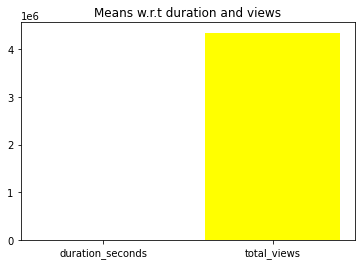

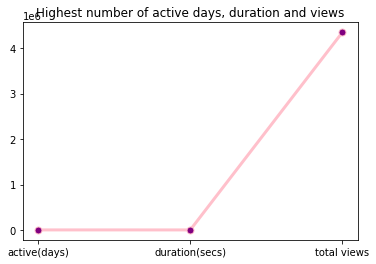

[0.09897389]
[ 0.0063547  -0.02719753]
[0.16252087]


Text(0, 0.5, 'Inertia')

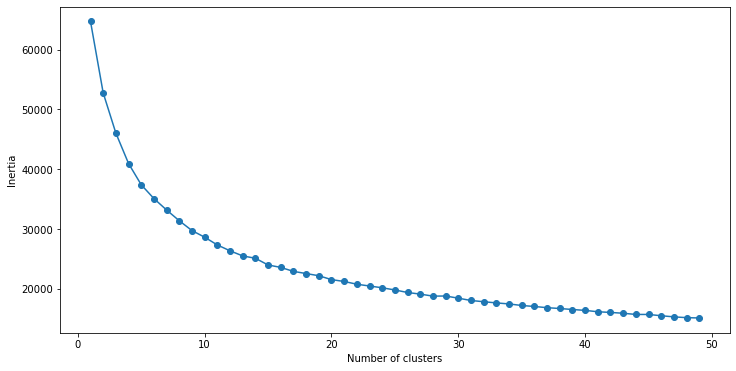

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# pandas
df = pd.read_csv(r'C:\Users\ABC\Desktop\BAI\BAI-S3\Programming for AI Lab\Final Project\5-Minute Crafts edited.csv')
df.drop(labels=['actors_salary'], axis=1, inplace = True)
df["active_since_days"].replace({'/': 0, '?': 1}, inplace = True)
df["duration_seconds"].replace({'/': 0, '?': 1}, inplace = True)
df["total_views"].replace({'/': 0, '?': 1}, inplace = True)
df["num_chars"].replace({'/': 0, '?': 1}, inplace = True)
df["num_words"].replace({'/': 0, '?': 1}, inplace = True)
df["num_punctuation"].replace({'/': 0, '?': 1}, inplace = True)
df["num_words_uppercase"].replace({'/': 0, '?': 1}, inplace = True)
df["num_words_lowercase"].replace({'/': 0, '?': 1}, inplace = True)
df["num_stopwords"].replace({'/': 0, '?': 1}, inplace = True)
df["avg_word_len"].replace({'/': 0, '?': 1}, inplace = True)
df["contain_digits"].replace({'/': 0, '?': 1}, inplace = True)
df["startswith_digits"].replace({'/': 0, '?': 1}, inplace = True)
df["title_sentiment"].replace({'/': 0, '?': 1}, inplace = True)


# df.video_id = df.video_id.astype('float64')
# df.title = df.title.astype('float64')
df.active_since_days = df.active_since_days.astype('float64')
df.duration_seconds = df.duration_seconds.astype('float64')
df.total_views = df.total_views.astype('float64')
df.num_chars = df.num_chars.astype('float64')
df.num_words = df.num_words.astype('float64')
df.num_punctuation = df.num_punctuation.astype('float64')
df.num_words_uppercase = df.num_words_uppercase.astype('float64')
df.num_words_lowercase = df.num_words_lowercase.astype('float64')
df.num_stopwords = df.num_stopwords.astype('float64')
df.avg_word_len = df.avg_word_len.astype('float64')
df.contain_digits = df.contain_digits.astype('float64')
df.startswith_digits = df.startswith_digits.astype('float64')
df.title_sentiment = df.title_sentiment.astype('float64')
df = df.fillna(df.mean())
# print(df.describe())

# matplotlib
# mean
mean1 = [df['duration_seconds'].mean(), df["total_views"].mean()]
mean2 = ['duration_seconds', 'total_views']
plt.title("Means w.r.t duration and views")
plt.bar(mean2, mean1, color=['red', 'yellow'])
plt.show() # it already scaled the data
# le6 = followed by 6 zeros

# median
mode1 = [df['active_since_days'].mode(), df['duration_seconds'].mode(), df['total_views'].mode()]
mode2 = ['active(days)', 'duration(secs)', 'total views']
plt.title("Highest number of active days, duration and views")
plt.plot(mode2, mode1, color = 'pink', linestyle = 'solid', linewidth = 3, marker = 'o', markerfacecolor = 'purple', markersize = 7)
plt.show() # it already scaled data

# Sklearn
# Regression
X = df[['num_chars', 'num_words']]
Y = df['title_sentiment']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
predictedsentiment = regr.predict([[15, 6]])
print(predictedsentiment)
print(regr.coef_)
predictedsentiment = regr.predict([[25, 6]])
print(predictedsentiment) # first predicted sentiment + (10 * first coeff). giving correct output

# Clustering
df.drop(labels=['video_id'], axis=1, inplace = True)
df.drop(labels=['title'], axis=1, inplace = True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pd.DataFrame(data_scaled)
# print(pd.DataFrame(data_scaled).describe())
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
kmeans.inertia_
SSE = []
for cluster in range(1,50):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,50), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Group Members:
## Manahil Fatima Anwar 20K-0134
## Usman Yaqoob 20K-0355

## BAI-3A